In [1]:
from ClassSARenvironment import SARenvHRL
from ClassHierarchicalQlearningAgent import HierarchicalQLearningAgent
from ClassHierarchicalQlearningAttentionAgent import HierarchicalQLearningAgent_ATTENTION
from utils_functions import animate_policy, evaluate_policy, plot_learning_curve, plot_steps, visitation_heatmap

Initialization complete.


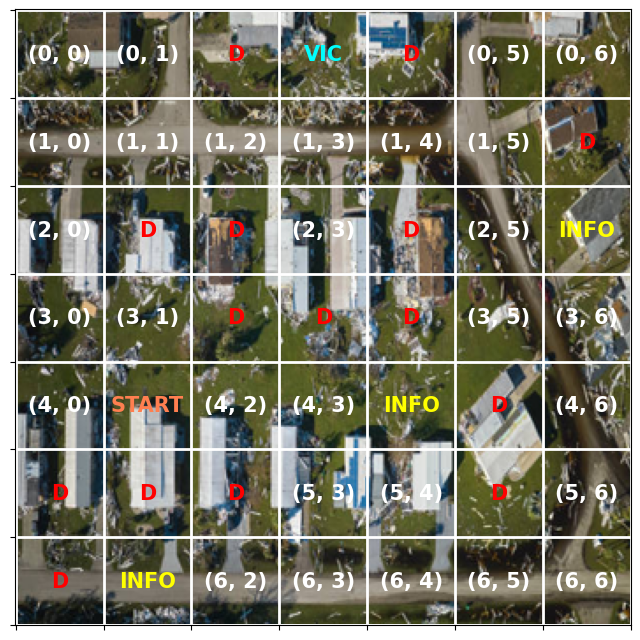

In [2]:
# Example initialization and training
gridsize = [7, 7]
startState = [(4, 1)]
victimStates = [(0, 3)]
ditches = [(1, 6), (2, 1), (2, 2), (2, 4), (3, 2), (3, 3), (3, 4), (4, 5), \
         (5, 0), (5, 1), (5, 2), (6, 0), (0, 2), (0, 4), (5, 5)]
fires = []
POIs = []
infoLocation = [(6, 1), (4, 4), (2, 6)]
fires = []
POIs = []
image_path = "/home/dimiubuntu/smc_24/HRL-LLM/images/disaster_area.jpg"
document_path = "/home/dimiubuntu/smc_24/HRL-LLM/data/sar_data.json"


env = SARenvHRL(gridsize, startState, victimStates, ditches, fires, POIs, infoLocation, image_path, document_path, mode='debug')